## For all TRA@ genes, find any SNP in chr14 that predicts usage. Same for TRB@ genes and chr7

## Create .pheno files with TCR usages in columns

In [7]:
import pandas as pd
import os

In [8]:
usage_path = "/home/ashteng/TCR_usages/DGN_vdj_usages_table.csv"
chr14_fam_path = "/home/ashteng/DGNGeno/CHR14_GenRED.II.autosomalClean.Final.fam"
chr7_fam_path = "/home/ashteng/DGNGeno/CHR7_GenRED.II.autosomalClean.Final.fam"
chr14_pheno_path = "/home/ashteng/DGNGeno/GenRED.II.autosomalClean.Final_CHR14.pheno"
chr7_pheno_path = "/home/ashteng/DGNGeno/GenRED.II.autosomalClean.Final_CHR7.pheno"
TRAB = "TRA"
if TRAB == "TRA":
    fam_path = chr14_fam_path
    pheno_path = chr14_pheno_path
else:
    fam_path = chr7_fam_path
    pheno_path = chr7_pheno_path

In [ ]:
# Family ID ('FID')
# Within-family ID ('IID'; cannot be '0')
# Within-family ID of father ('0' if father isn't in dataset)
# Within-family ID of mother ('0' if mother isn't in dataset)
# Sex code ('1' = male, '2' = female, '0' = unknown)
# Phenotype value ('1' = control, '2' = case, '-9'/'0'/non-numeric = missing data if case/control)

In [ ]:
fam_df = pd.read_csv(fam_path, delim_whitespace=True, header=None, names=["FID", "IID", "Father", "Mother", "Sex", "Phenotype"])

In [ ]:
fam_df['patid'] = fam_df['IID'].apply(lambda s: s.split("_")[-1])

In [ ]:
fam_df

In [ ]:
usage_df = pd.read_csv(usage_path)

In [ ]:
df = pd.merge(fam_df, usage_df, on="patid", how="outer")

In [ ]:
usage_df.columns

In [ ]:
# Save file with all patids to keep
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[~row_has_NaN]
keep_df = rows_with_NaN[['FID', 'IID']]
keep_df.to_csv("/home/ashteng/DGNGeno/dgn_keep_fam.txt", header=None, index=None, sep = "\t")

In [ ]:
df = df.fillna(0.0).drop(["patid", "Phenotype", "Father", "Mother", "Sex"], axis=1)

In [ ]:
TRA_families = [x for x in df.columns if x.startswith("TRA")]
TRB_families = [x for x in df.columns if x.startswith("TRB")]

In [ ]:
if TRAB == "TRA":
    df = df.drop(columns=TRB_families)
else:
    df = df.drop(columns=TRA_families)

In [ ]:
df.columns = [x.split("/")[0] for x in df.columns]

In [ ]:
df

In [ ]:
df.to_csv(pheno_path, index=None, sep = "\t")

## After creating .pheno files, run plink

TRA:
plink --bfile CHR14_GenRED.II.autosomalClean.Final --allow-no-sex --keep dgn_keep_fam.txt --snps-only --chr 14 --from-bp 22090057 --to-bp 23021075 --maf --pheno GenRED.II.autosomalClean.Final_CHR14.pheno --all-pheno --assoc --freqx --out assoc_results_imputed/TRA_eQTL

TRB:
plink --bfile CHR7_GenRED.II.autosomalClean.Final --allow-no-sex --keep dgn_keep_fam.txt --snps-only --chr 7 --from-bp 141998851 --to-bp 142510972 --maf --pheno GenRED.II.autosomalClean.Final_CHR7.pheno --all-pheno --assoc --freqx --out assoc_results_imputed/TRB_eQTL

## Plotting

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.stats.multitest import fdrcorrection
from sklearn.cluster import KMeans
import pickle

In [135]:
assoc_path = "/home/ashteng/DGNGeno/assoc_results_imputed"

In [136]:
TRAB = "TRB"

In [137]:
if TRAB == "TRA":
    fam_path = chr14_fam_path
    pheno_path = chr14_pheno_path
else:
    fam_path = chr7_fam_path
    pheno_path = chr7_pheno_path

df = pd.read_csv(pheno_path, delimiter="\t")

families = [x for x in df.columns if x.startswith(TRAB)]

In [139]:
if TRAB == "TRA":
    n_peaks_dict = pickle.load(open("TRA_n_peaks_dict.pkl", "rb"))
else:
    n_peaks_dict = pickle.load(open("TRB_n_peaks_dict.pkl", "rb"))

In [140]:
# families = ["TRAV9-1"]

In [141]:
def get_SNP_name(SNP):
    token = SNP.split(":")[0]
    if token.startswith("rs"):
        return token
    else:
        return SNP

In [81]:
#n_peaks_dict = dict()

TRAJ1
TRAJ10
TRAJ11
TRAJ12
TRAJ13
TRAJ14
TRAJ15
TRAJ16
TRAJ17
TRAJ18
TRAJ19
TRAJ2
TRAJ20
TRAJ21
TRAJ22
TRAJ23
TRAJ24
TRAJ25
TRAJ26
TRAJ27
TRAJ28


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAJ29
TRAJ3
TRAJ30


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAJ31
TRAJ32
TRAJ33
TRAJ34
TRAJ35
TRAJ36


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAJ37


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAJ38


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAJ39
TRAJ4


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAJ40
TRAJ41
TRAJ42


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAJ43


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAJ44


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAJ45


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAJ46
TRAJ47


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAJ48
TRAJ49
TRAJ5


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAJ50


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAJ51


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAJ52
TRAJ53
TRAJ54
TRAJ55
TRAJ56


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAJ57


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAJ58
TRAJ59
TRAJ6
TRAJ60
TRAJ61


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAJ7


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAJ8
TRAJ9
TRAV1-1


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV1-2
TRAV10


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV11
TRAV12-1


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV12-2
TRAV12-3


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV13-1
TRAV13-2


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV14


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV16
TRAV17


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV18
TRAV19


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV2
TRAV20


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV21
TRAV22
TRAV23


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV24


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV25
TRAV26-1


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV26-2
TRAV27


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV29
TRAV3


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV30


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV34
TRAV35


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV36
TRAV38-1


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV38-2
TRAV39


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV4


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV40
TRAV41


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV5


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV6
TRAV7


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV8-1


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV8-2


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV8-3
TRAV8-4


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV8-6


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV8-7
TRAV9-1


/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


TRAV9-2


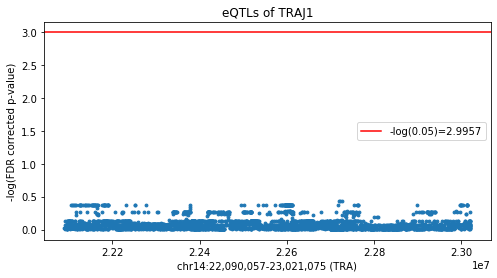

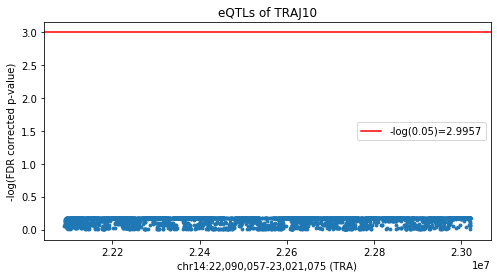

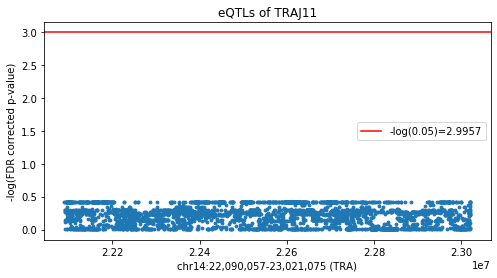

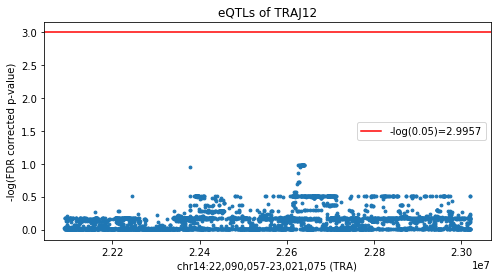

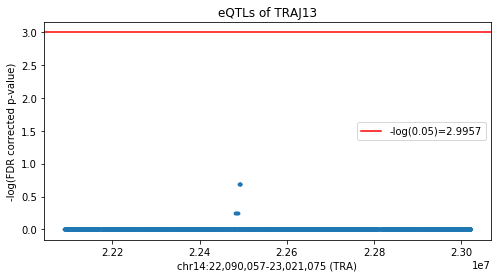

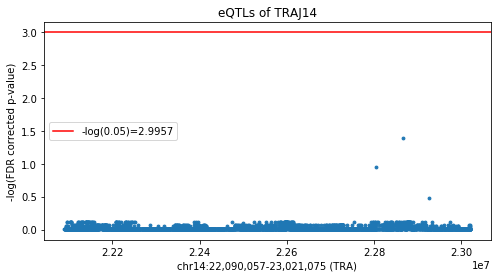

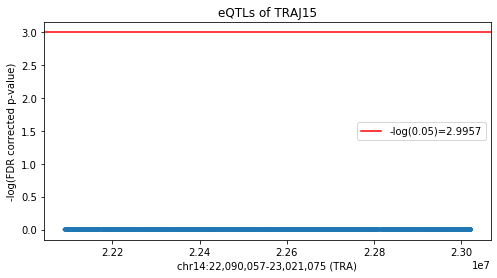

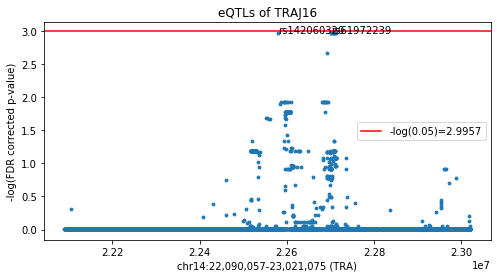

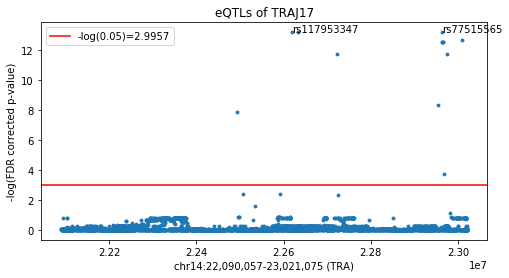

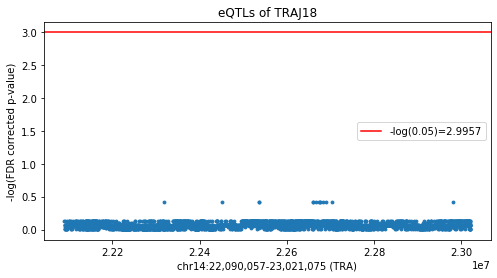

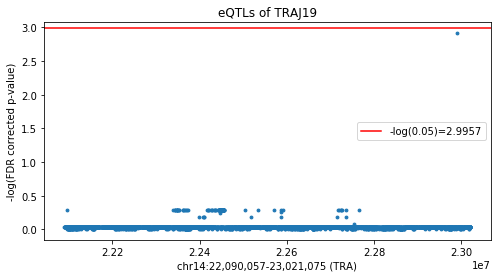

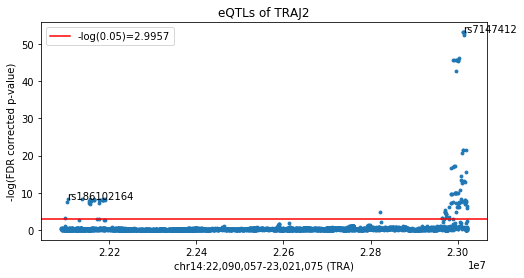

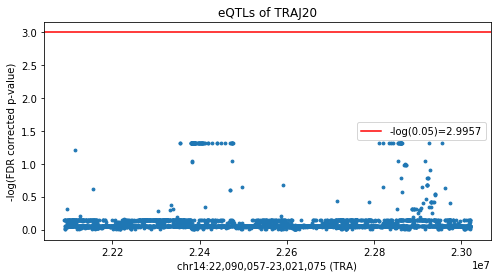

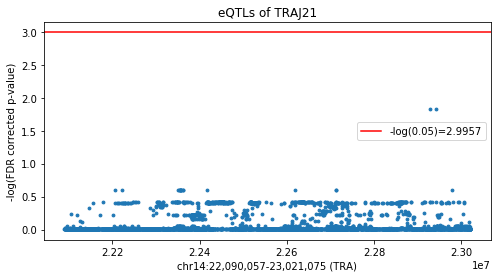

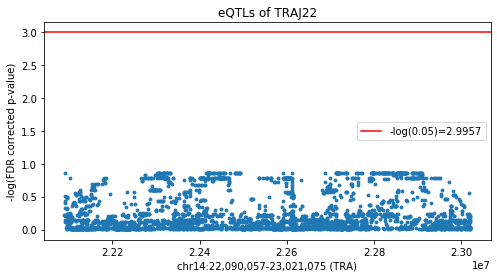

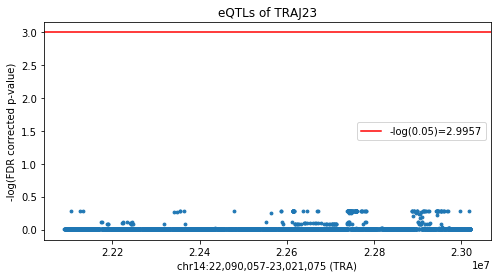

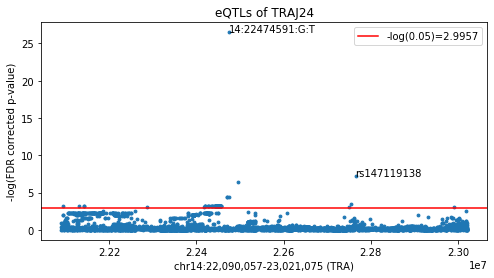

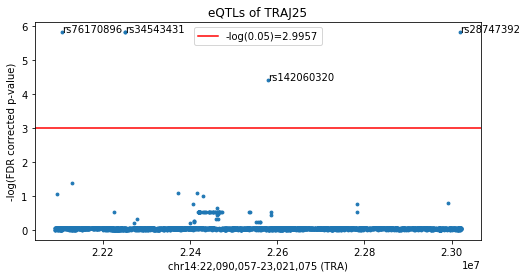

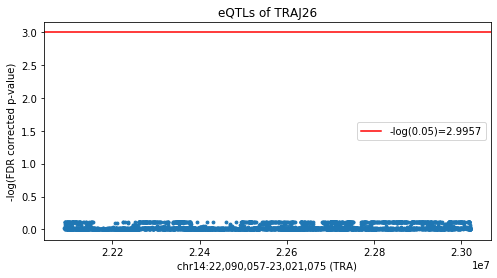

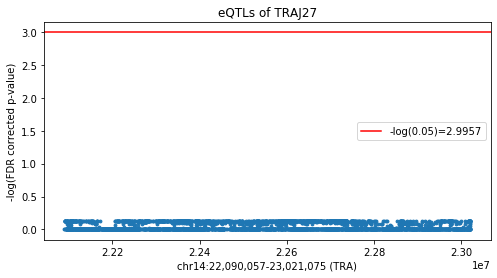

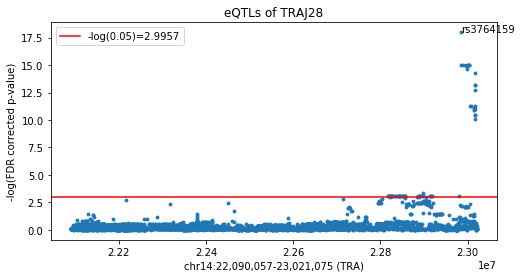

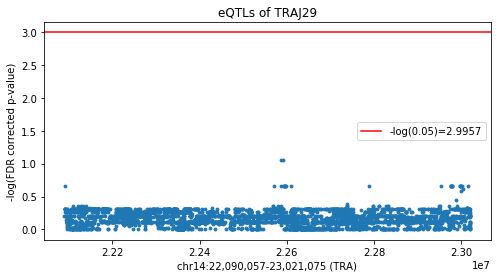

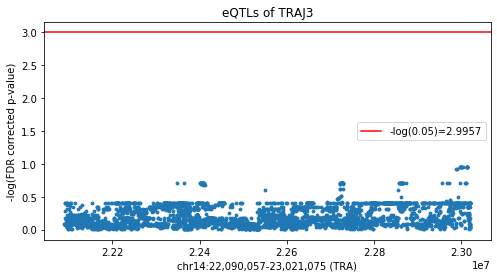

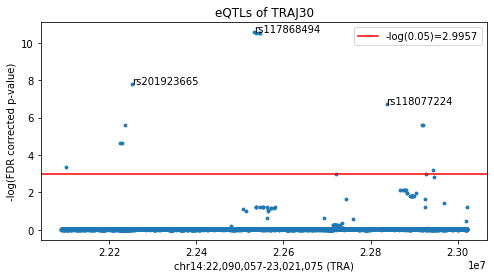

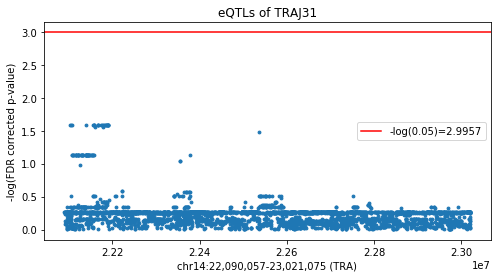

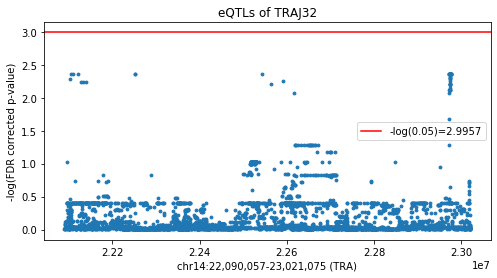

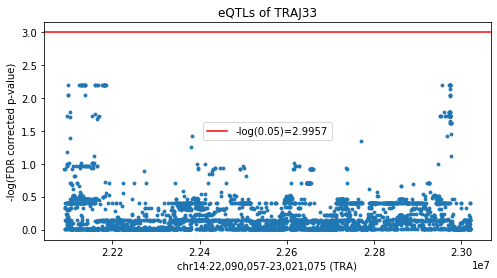

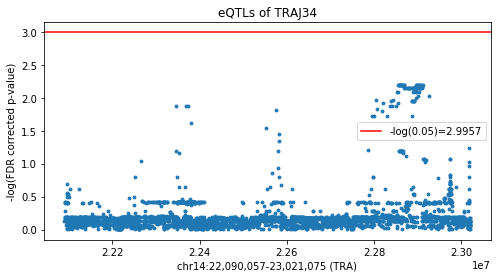

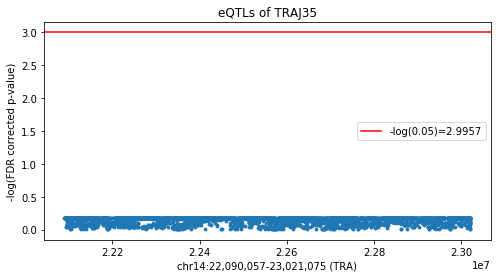

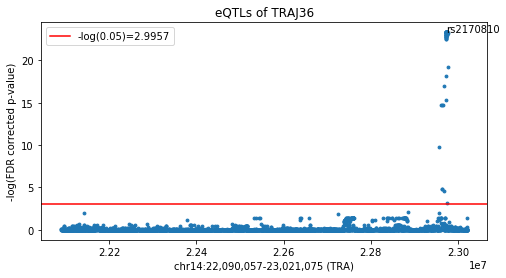

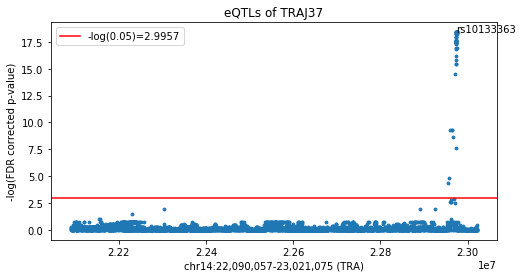

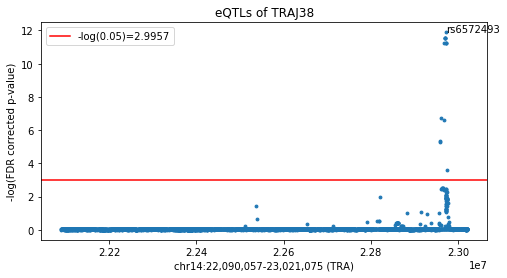

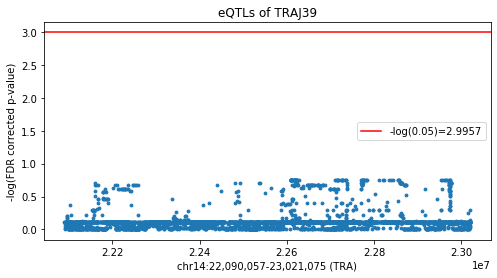

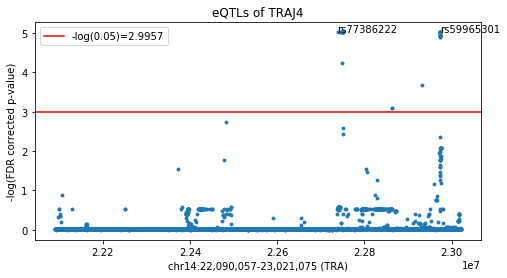

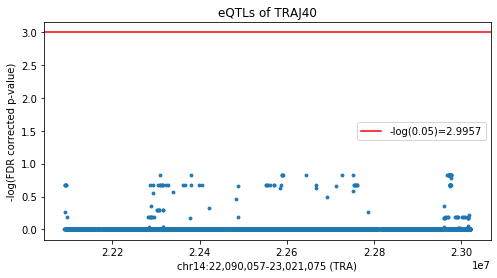

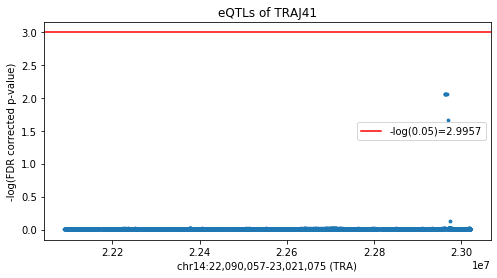

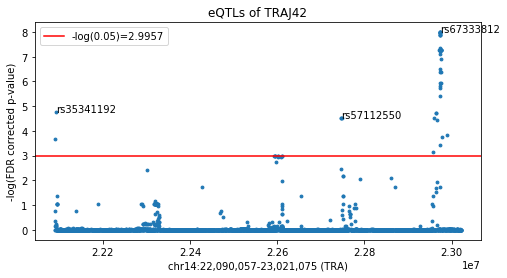

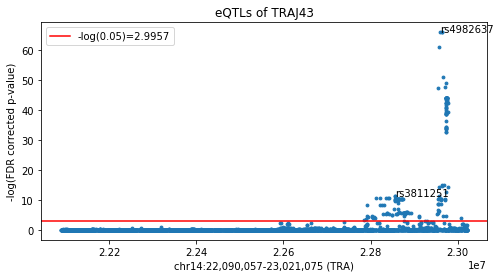

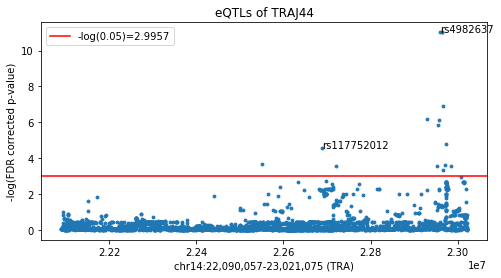

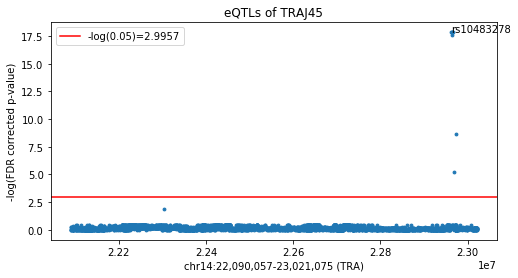

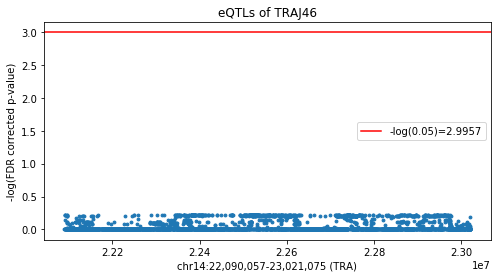

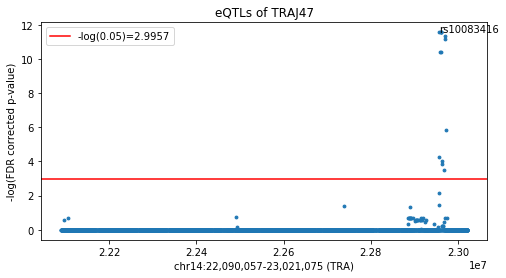

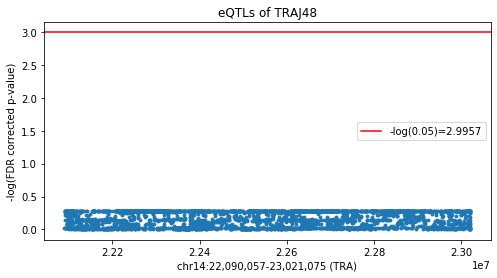

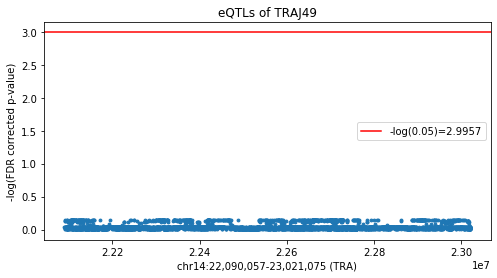

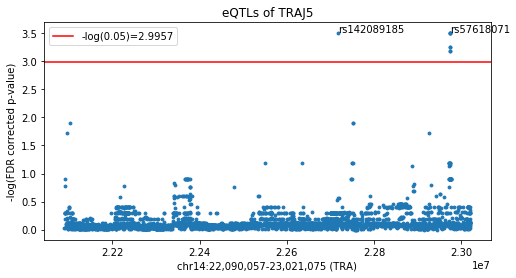

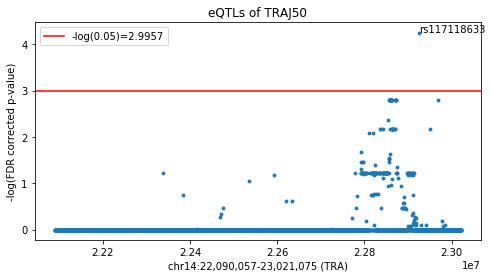

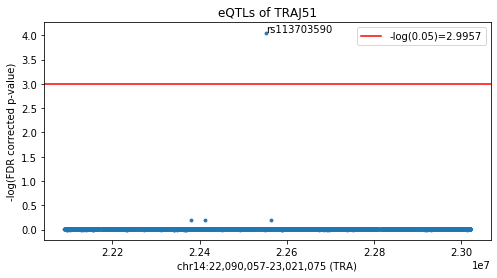

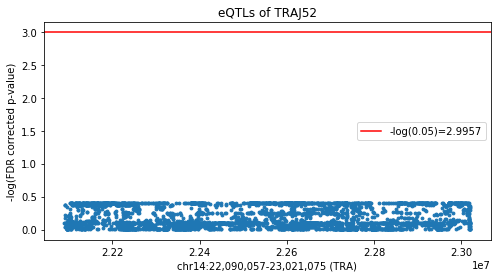

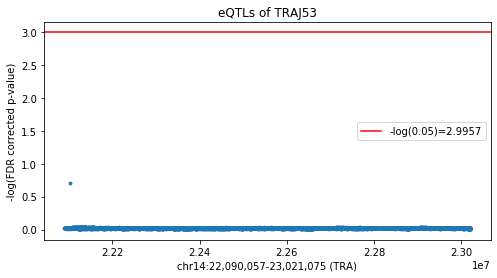

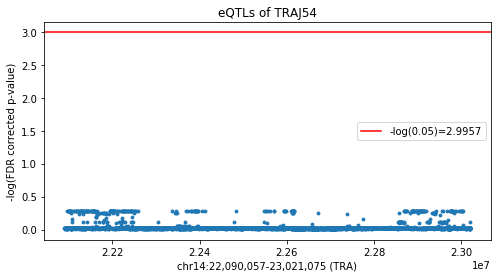

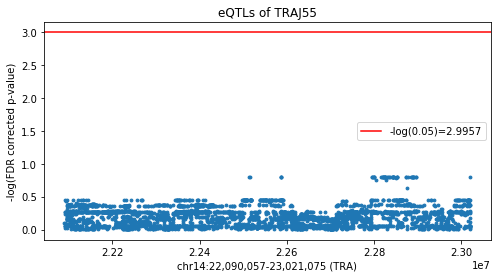

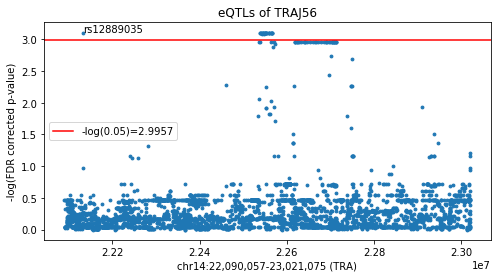

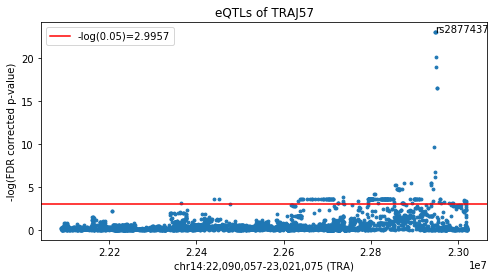

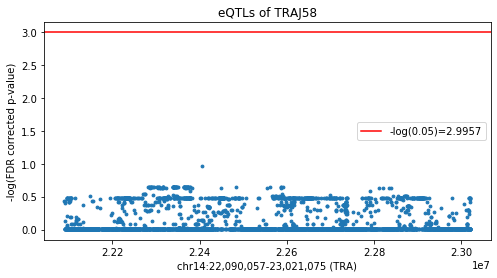

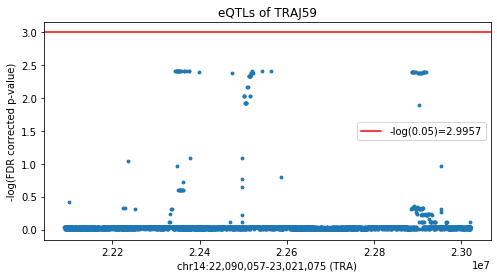

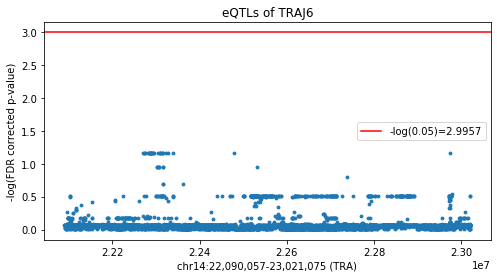

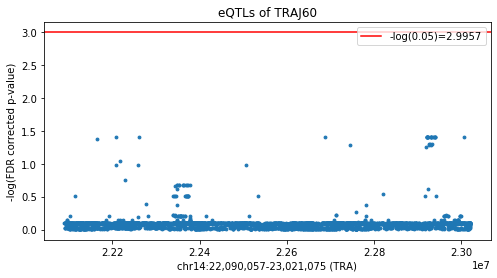

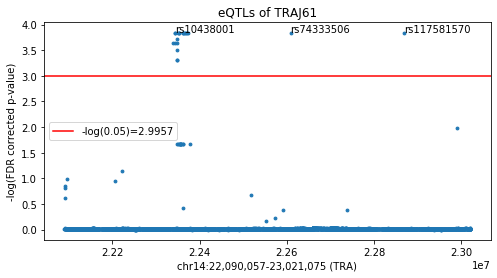

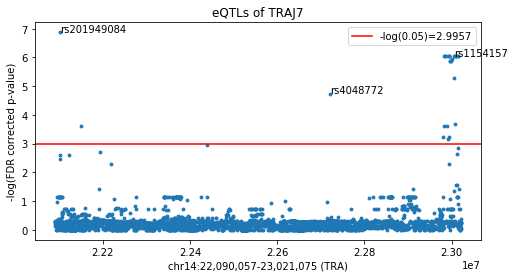

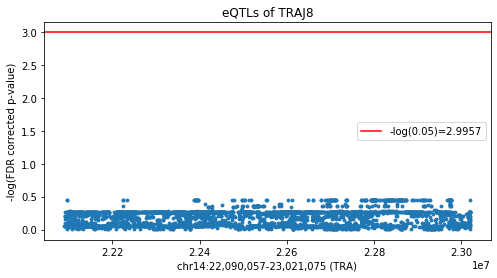

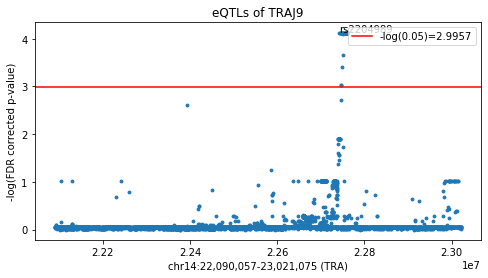

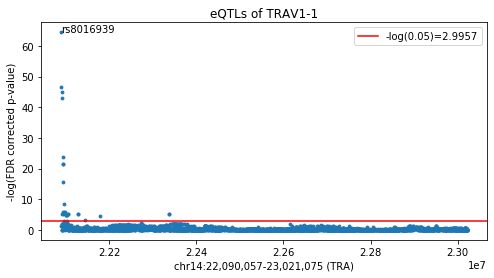

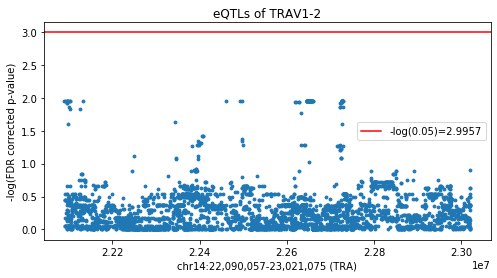

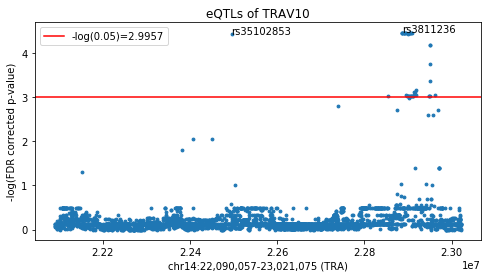

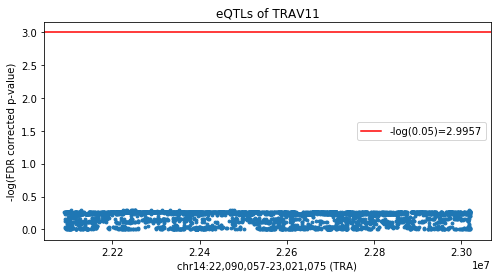

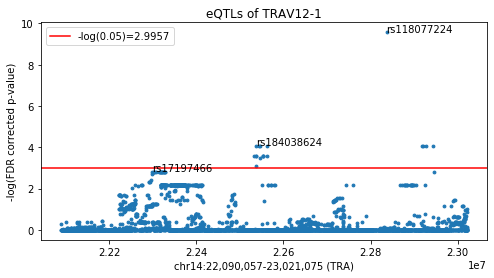

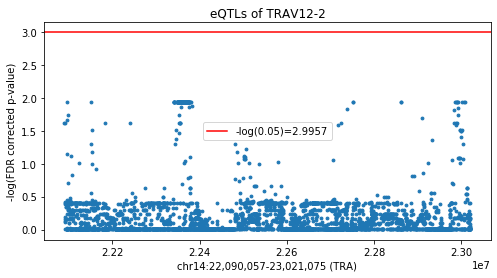

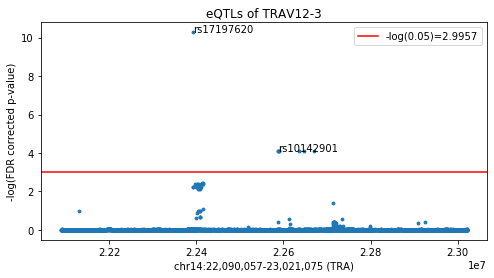

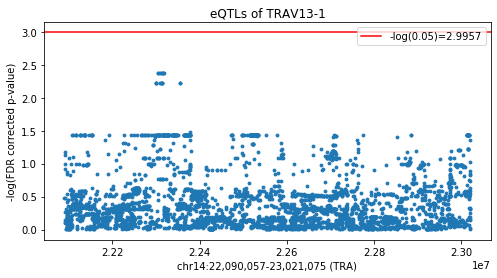

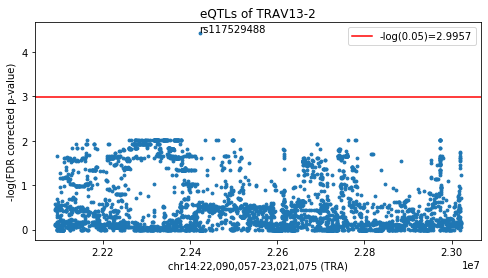

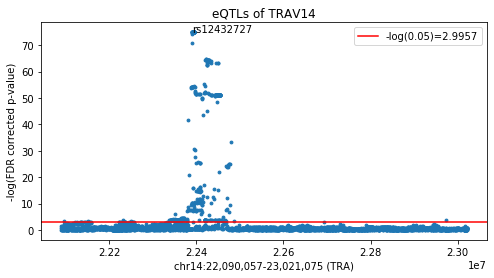

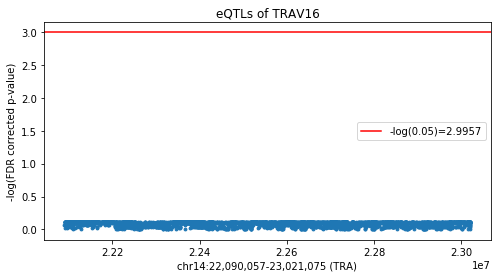

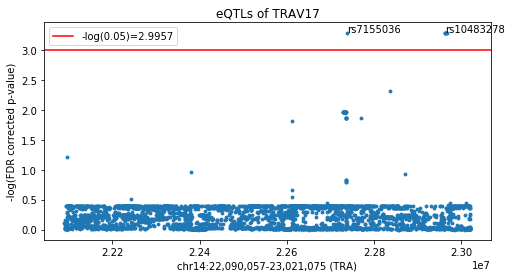

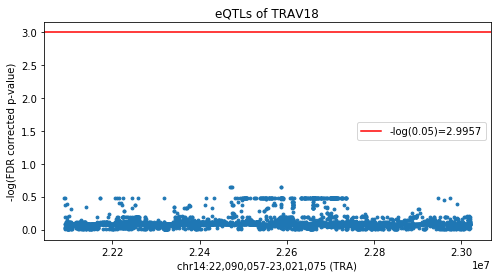

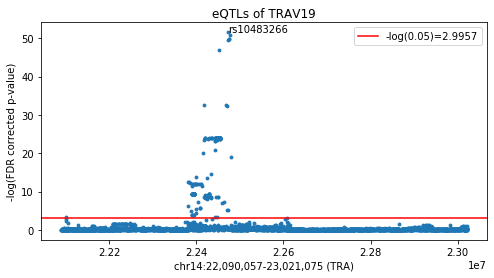

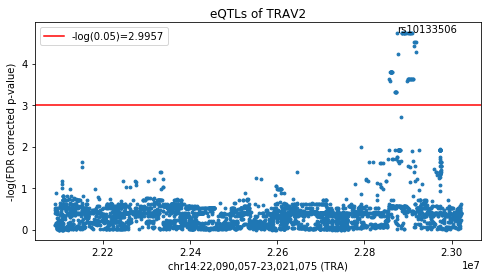

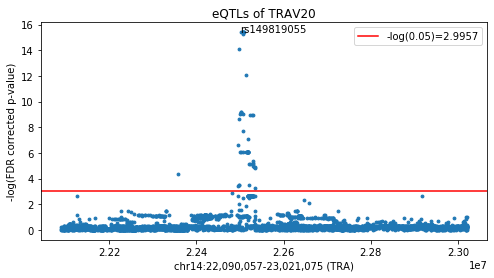

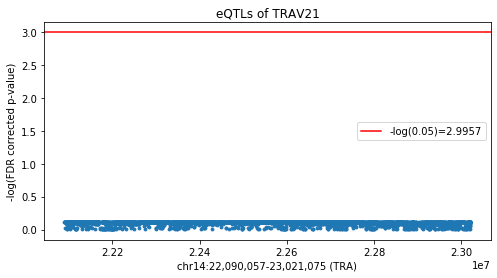

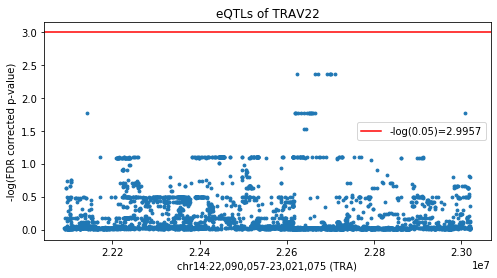

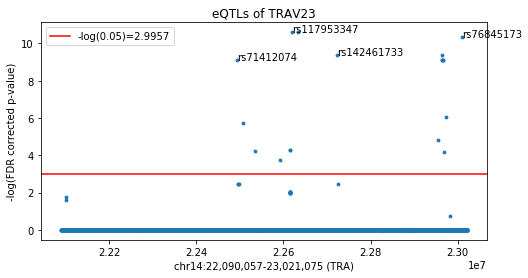

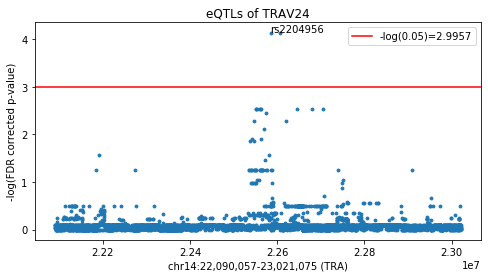

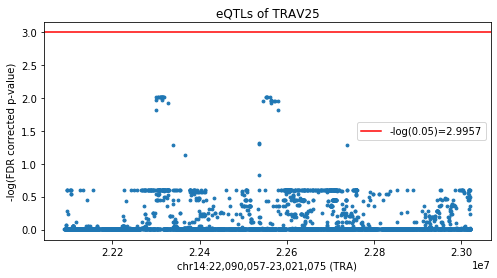

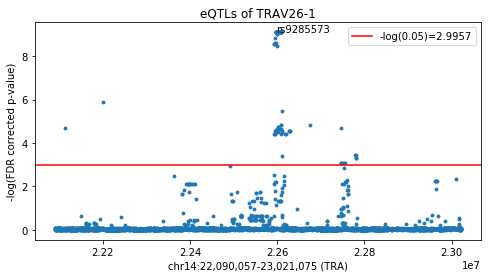

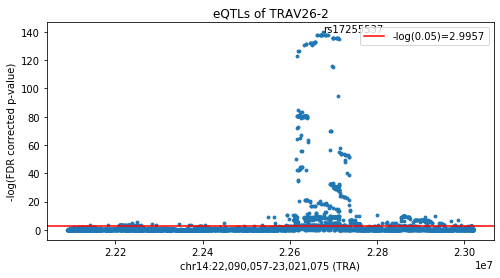

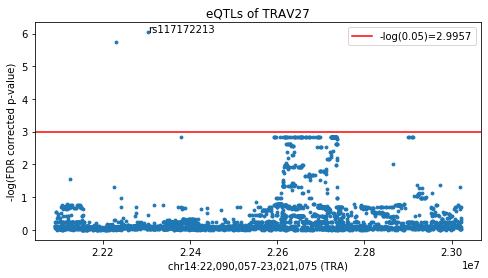

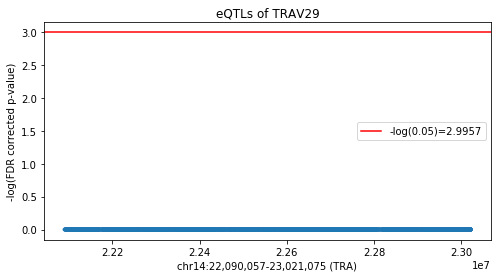

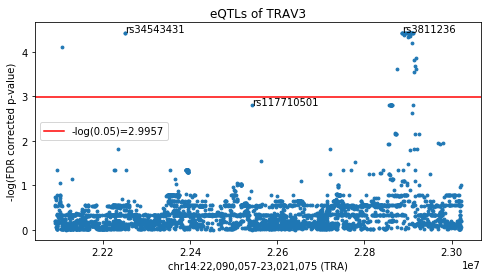

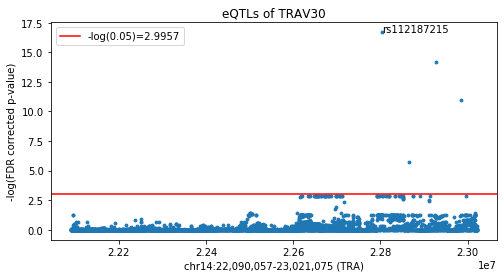

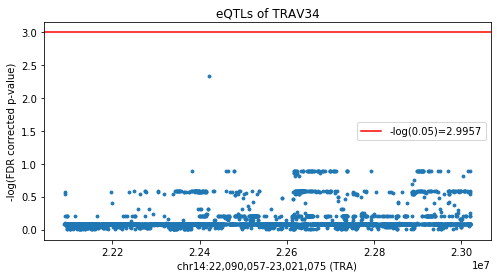

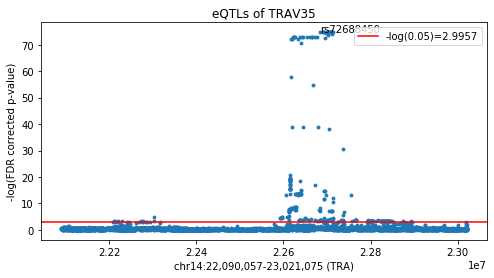

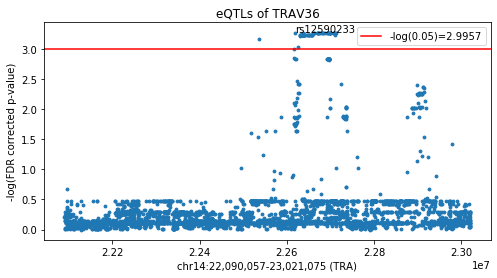

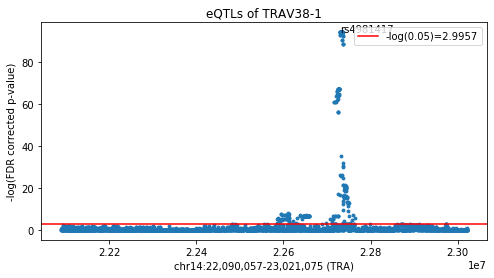

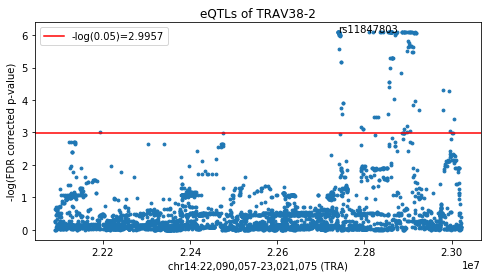

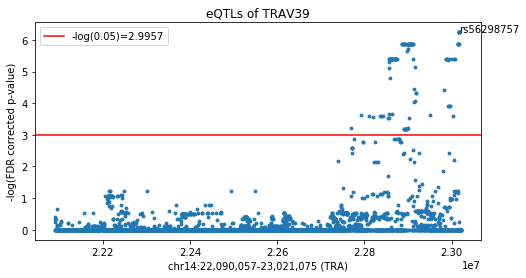

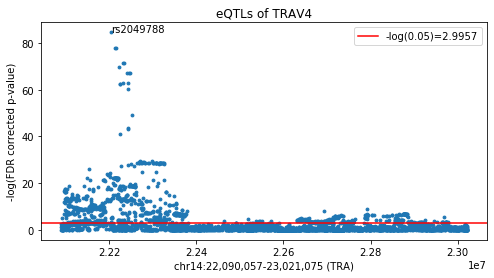

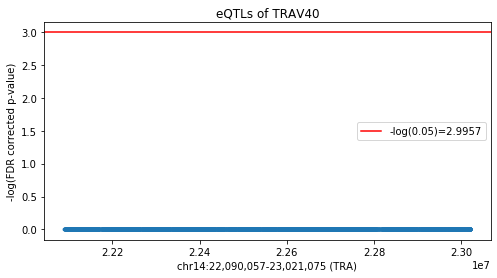

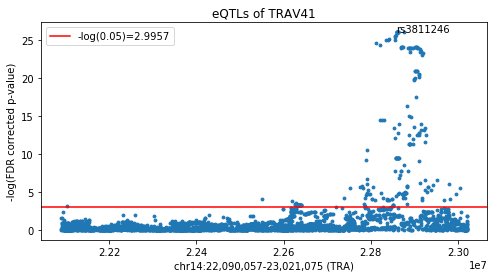

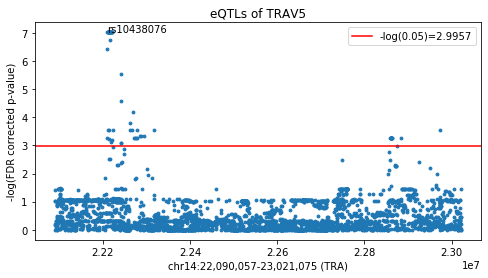

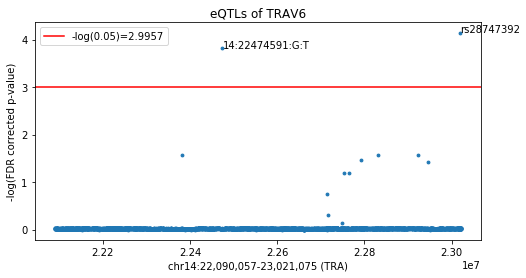

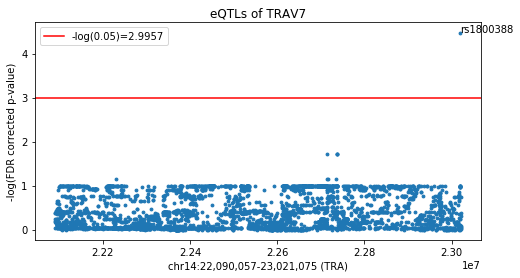

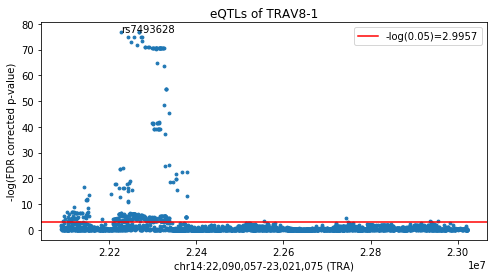

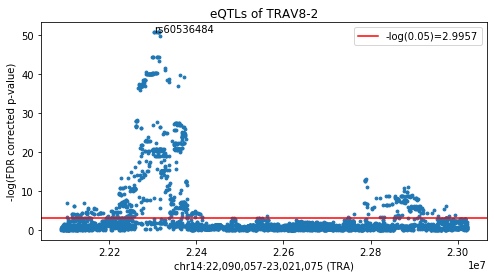

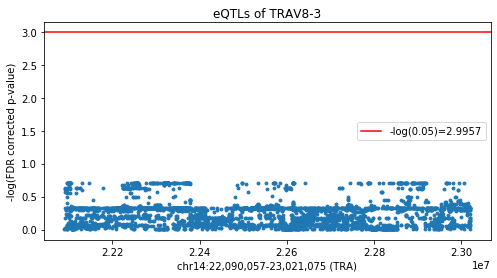

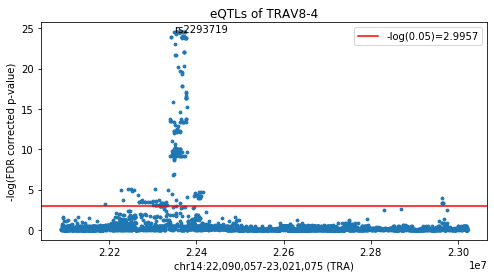

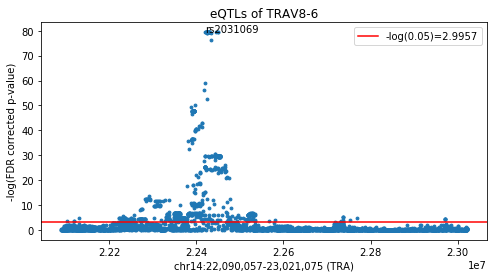

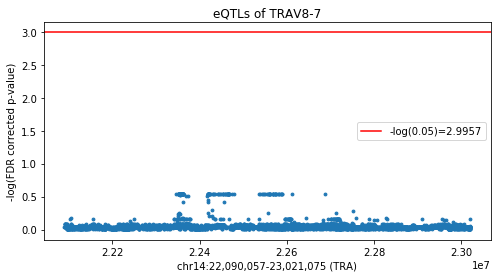

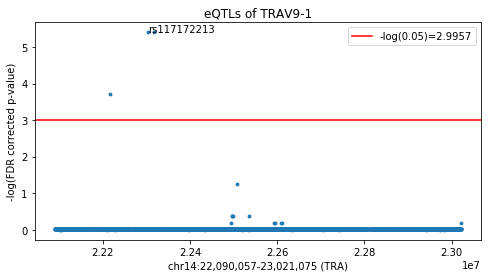

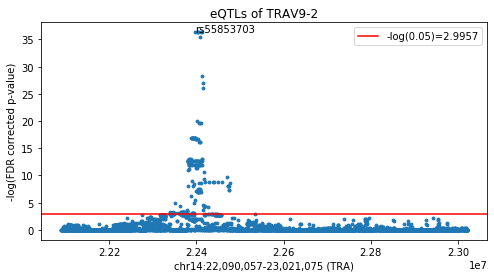

In [82]:
peak_dfs = []
for family in families:
    print(family)
    assoc_df = pd.read_csv(os.path.join(assoc_path, "{}_eQTL.{}.qassoc".format(TRAB, family)), delim_whitespace=True)
    # assoc_df = assoc_df.sort_values("FDR_P", ascending=True)
    assoc_df['FDR_P'] = fdrcorrection(assoc_df["P"])[1]
    
    n_peaks = n_peaks_dict[family]
    label = False
    if n_peaks > 0:
        peak_rows = []
        sig_assoc_df = assoc_df[assoc_df['FDR_P'] < 0.1]
        if len(sig_assoc_df) > 0:
            label = True
            BPs = sig_assoc_df['BP'].values
            kmeans = KMeans(n_clusters=n_peaks, random_state=0)
            groups = kmeans.fit_predict(BPs.reshape(-1,1))
            for i in range(n_peaks):
                group_BPs = BPs[groups == i]
                group_df = sig_assoc_df[(sig_assoc_df['BP'] >= np.min(group_BPs)) & (sig_assoc_df['BP'] <= np.max(group_BPs))]
                peak_row = group_df['FDR_P'].idxmin()
                peak_rows.append(peak_row)
            peak_rows = np.array(peak_rows)

            peak_df = assoc_df.iloc[peak_rows]
            peak_df.insert(0, "GENE", family)
            peak_dfs.append(peak_df)

    fig, ax = plt.subplots(figsize=(8,4))
    thresh = -np.log(0.05)
    x = np.array(assoc_df['BP'])
    y = np.array(-np.log(assoc_df['FDR_P']))
    labels = np.array(assoc_df['SNP'].apply(lambda s: get_SNP_name(s)))
    plt.scatter(x, y, s=8.0)
    plt.axhline(y=thresh, color='r', linestyle='-', label="-log(0.05)={:.4f}".format(thresh))
    x_label = "chr14:22,090,057-23,021,075 (TRA)" if TRAB == "TRA" else "chr7:141,998,851-142,510,972 (TRB)"
    plt.xlabel(x_label)
    plt.ylabel("-log(FDR corrected p-value)")
    plt.title("eQTLs of {}".format(family))
    plt.legend()
    

    def label_point(x, y, val, ax):
        for i in range(len(x)):
            ax.text(x[i], y[i], val[i])

    if label:
        label_point(x[peak_rows]+0.01, y[peak_rows], labels[peak_rows], plt.gca())

    plt.savefig("{}_{}_eQTL.png".format(family, TRAB))

#     n_peaks = int(input("num peaks?"))
#     n_peaks_dict[family] = n_peaks

In [87]:
# if TRAB == "TRA":
#     pickle.dump(n_peaks_dict, open("TRA_n_peaks_dict.pkl", "wb"))
# else:
#     pickle.dump(n_peaks_dict, open("TRB_n_peaks_dict.pkl", "wb"))

In [83]:
if TRAB == "TRA":
    TRA_peaks = pd.concat(peak_dfs)
else:
    TRB_peaks = pd.concat(peak_dfs)

In [84]:
all_peaks = pd.concat([TRA_peaks, TRB_peaks])

In [85]:
all_peaks.to_csv("peaks.csv", index=None)

In [86]:
import pickle

In [113]:
TRB_families

[]

## investigating one particular SNP

In [142]:
SNP = "rs72638479"

snp_rows = []
for TRAB in ["TRA", "TRB"]:

    if TRAB == "TRA":
        fam_path = chr14_fam_path
        pheno_path = chr14_pheno_path
    else:
        fam_path = chr7_fam_path
        pheno_path = chr7_pheno_path
    df = pd.read_csv(pheno_path, delimiter="\t")
    families = [x for x in df.columns if x.startswith(TRAB)]
    
    for family in families:
        print(family)
        assoc_df = pd.read_csv(os.path.join(assoc_path, "{}_eQTL.{}.qassoc".format(TRAB, family)), delim_whitespace=True)
        # assoc_df = assoc_df.sort_values("FDR_P", ascending=True)
        assoc_df['FDR_P'] = fdrcorrection(assoc_df["P"])[1]
        assoc_df['FAMILY'] = family
        snp_row = assoc_df[assoc_df["SNP"].str.startswith(SNP)]
        snp_rows.append(snp_row)

TRAJ1
TRAJ10
TRAJ11
TRAJ12
TRAJ13
TRAJ14
TRAJ15
TRAJ16
TRAJ17
TRAJ18
TRAJ19
TRAJ2
TRAJ20
TRAJ21
TRAJ22
TRAJ23
TRAJ24
TRAJ25
TRAJ26
TRAJ27
TRAJ28
TRAJ29
TRAJ3
TRAJ30
TRAJ31
TRAJ32
TRAJ33
TRAJ34
TRAJ35
TRAJ36
TRAJ37
TRAJ38
TRAJ39
TRAJ4
TRAJ40
TRAJ41
TRAJ42
TRAJ43
TRAJ44
TRAJ45
TRAJ46
TRAJ47
TRAJ48
TRAJ49
TRAJ5
TRAJ50
TRAJ51
TRAJ52
TRAJ53
TRAJ54
TRAJ55
TRAJ56
TRAJ57
TRAJ58
TRAJ59
TRAJ6
TRAJ60
TRAJ61
TRAJ7
TRAJ8
TRAJ9
TRAV1-1
TRAV1-2
TRAV10
TRAV11
TRAV12-1
TRAV12-2
TRAV12-3
TRAV13-1
TRAV13-2
TRAV14
TRAV16
TRAV17
TRAV18
TRAV19
TRAV2
TRAV20
TRAV21
TRAV22
TRAV23
TRAV24
TRAV25
TRAV26-1
TRAV26-2
TRAV27
TRAV29
TRAV3
TRAV30
TRAV34
TRAV35
TRAV36
TRAV38-1
TRAV38-2
TRAV39
TRAV4
TRAV40
TRAV41
TRAV5
TRAV6
TRAV7
TRAV8-1
TRAV8-2
TRAV8-3
TRAV8-4
TRAV8-6
TRAV8-7
TRAV9-1
TRAV9-2
TRBJ1-1
TRBJ1-2
TRBJ1-3
TRBJ1-4
TRBJ1-5
TRBJ1-6
TRBJ2-1
TRBJ2-2
TRBJ2-3
TRBJ2-4
TRBJ2-5
TRBJ2-6
TRBJ2-7
TRBV10-1
TRBV10-2
TRBV10-3
TRBV11-1
TRBV11-2
TRBV11-3
TRBV12-3
TRBV12-4
TRBV12-5
TRBV13
TRBV14
TRBV15
TRBV18
TRBV19
TRBV2
TRBV2

In [143]:
snp_df = pd.concat(snp_rows)

In [144]:
snp_df.sort_values("P", ascending=True).to_csv("{}_eQTL_assoc.csv".)

,CHR,SNP,BP,NMISS,BETA,SE,R2,T,P,FDR_P,FAMILY
1068,14,rs72638479:22307557:C:A,22307557,894,0.003152,0.000479,4.634000e-02,6.58400,7.829000e-11,1.413218e-09,TRAV8-2
1068,14,rs72638479:22307557:C:A,22307557,894,0.002891,0.000633,2.285000e-02,4.56800,5.626000e-06,7.773776e-05,TRAV8-6
1068,14,rs72638479:22307557:C:A,22307557,894,0.003349,0.001136,9.654000e-03,2.94900,3.274000e-03,3.857863e-01,TRAJ6
1068,14,rs72638479:22307557:C:A,22307557,894,0.002292,0.000779,9.609000e-03,2.94200,3.347000e-03,1.787395e-02,TRAV4
1068,14,rs72638479:22307557:C:A,22307557,894,-0.001605,0.000573,8.719000e-03,-2.80100,5.205000e-03,5.221081e-01,TRAJ58
...,...,...,...,...,...,...,...,...,...,...,...
1068,14,rs72638479:22307557:C:A,22307557,894,-0.000022,0.000696,1.168000e-06,-0.03228,9.743000e-01,9.934352e-01,TRAJ48
1068,14,rs72638479:22307557:C:A,22307557,894,0.000024,0.000834,9.011000e-07,0.02835,9.774000e-01,9.951257e-01,TRAJ44
1068,14,rs72638479:22307557:C:A,22307557,894,0.000016,0.000593,7.734000e-07,0.02627,9.791000e-01,9.903392e-01,TRAJ12
1068,14,rs72638479:22307557:C:A,22307557,894,0.000011,0.000753,2.416000e-07,0.01468,9.883000e-01,9.955755e-01,TRAJ53
